# Imports + Downloading

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, confusion_matrix
import imblearn
import category_encoders as ce


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Loading the data

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
# load data into df variable
df = pd.read_csv('/content/gdrive/My Drive/Assignment 3/ex3_data.csv')
df

,INTENSIVE,NEWSITEID,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,EGFR,SCREAT,SUB_CKD,RACE_BLACK,AGE,FEMALE,SUB_CVD,SUB_CLINICALCVD,SUB_SUBCLINICALCVD,SUB_SENIOR,RACE4,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE,EVENT_PRIMARY
0,Regular,74.0,29.732061,True,145,80,2,False,3,True,67.69,1.11,False,False,60,False,True,True,False,False,WHITE,155,81,36,92,5.80,33.115201,True,3,False
1,Regular,8.0,29.677619,True,138,71,1,False,2,True,60.64,1.17,False,False,75,False,False,False,False,True,WHITE,243,107,61,188,5.45,28.842380,True,2,False
2,Intensive,25.0,17.443819,True,143,92,2,False,2,False,68.44,1.09,False,False,62,False,False,False,False,False,WHITE,180,116,47,125,13.33,33.643060,False,2,False
3,Regular,96.0,8.627849,False,123,68,2,False,1,False,71.94,0.78,False,False,75,True,False,False,False,True,WHITE,234,93,89,109,6.12,29.337871,False,1,False
4,Intensive,42.0,23.751437,True,126,51,2,False,2,False,50.19,1.36,True,False,81,False,False,False,False,True,WHITE,126,108,39,84,28.78,36.660286,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,Regular,102.0,10.896486,False,138,59,2,False,2,True,79.57,0.71,False,False,78,True,False,False,False,True,WHITE,199,90,85,74,12.73,27.186534,True,2,False
8742,Regular,98.0,8.646088,False,119,73,3,False,2,False,22.60,2.08,True,False,85,True,False,False,False,True,WHITE,145,83,52,95,440.38,42.191997,True,1,False
8743,Regular,99.0,24.191491,True,137,75,0,True,2,False,74.74,1.00,False,False,66,False,True,True,False,False,WHITE,167,80,46,75,26.92,19.462021,True,2,False
8744,Intensive,15.0,20.354619,True,154,93,0,True,2,True,32.32,1.64,True,False,56,True,False,False,False,False,WHITE,245,103,37,369,3.20,35.579436,False,3,False


# Split to Train and Test

In [8]:
# splitting the data into 70% train set and 30% test set.
X_train, X_test, y_train, y_test = train_test_split(df.drop("EVENT_PRIMARY", axis=1), df.EVENT_PRIMARY, test_size = 0.3, random_state=0)

# Exploring Dataset

In [9]:
# get info about the columns type
display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6122 entries, 6138 to 2732
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INTENSIVE           6122 non-null   object 
 1   NEWSITEID           5796 non-null   float64
 2   RISK10YRS           6122 non-null   float64
 3   INCLUSIONFRS        6122 non-null   bool   
 4   SBP                 6122 non-null   int64  
 5   DBP                 6122 non-null   int64  
 6   N_AGENTS            6122 non-null   int64  
 7   NOAGENTS            6122 non-null   bool   
 8   SMOKE_3CAT          6122 non-null   int64  
 9   ASPIRIN             6122 non-null   bool   
 10  EGFR                6122 non-null   float64
 11  SCREAT              6122 non-null   float64
 12  SUB_CKD             6122 non-null   bool   
 13  RACE_BLACK          6122 non-null   bool   
 14  AGE                 6122 non-null   int64  
 15  FEMALE              6122 non-null   bool   
 16  SUB

None

In [10]:
# get info about mean, std, min, max, values
display(X_train.describe())

,NEWSITEID,RISK10YRS,SBP,DBP,N_AGENTS,SMOKE_3CAT,EGFR,SCREAT,AGE,CHR,GLUR,HDL,TRR,UMALCR,BMI,SBPTERTILE
count,5796.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000
mean,55.891649,20.263013,139.741261,78.133616,1.824567,1.694218,71.576599,1.078386,68.038876,189.800229,98.936785,52.745018,125.324894,42.124802,29.851622,2.010291
std,29.803121,10.896961,15.649653,12.012795,1.034417,0.693232,20.605170,0.341920,9.431987,40.905354,13.419479,14.436544,80.482783,165.513993,5.785701,0.820855
min,1.000000,1.863811,72.000000,40.000000,0.000000,1.000000,14.660000,0.420000,50.000000,80.000000,44.000000,17.000000,23.000000,1.650000,13.734281,1.000000
25%,32.000000,12.097237,130.000000,70.000000,1.000000,1.000000,57.822500,0.860000,61.000000,161.000000,91.000000,43.000000,78.000000,5.610000,25.883594,1.000000
50%,57.000000,17.985340,138.500000,78.000000,2.000000,2.000000,71.115000,1.010000,67.000000,186.000000,97.000000,50.000000,106.500000,9.515000,29.052644,2.000000
75%,81.000000,25.768375,149.000000,86.000000,3.000000,2.000000,84.470000,1.220000,76.000000,214.000000,105.000000,60.000000,149.000000,21.740000,32.956593,3.000000
max,102.000000,81.187680,231.000000,126.000000,6.000000,3.000000,186.190000,4.040000,90.000000,437.000000,286.000000,161.000000,1701.000000,4125.000000,63.932902,3.000000


In [11]:
# show number of missing values
num_missing = X_train.isnull().sum()
num_missing

INTENSIVE               0
NEWSITEID             326
RISK10YRS               0
INCLUSIONFRS            0
SBP                     0
DBP                     0
N_AGENTS                0
NOAGENTS                0
SMOKE_3CAT              0
ASPIRIN                 0
EGFR                    0
SCREAT                  0
SUB_CKD                 0
RACE_BLACK              0
AGE                     0
FEMALE                  0
SUB_CVD                 0
SUB_CLINICALCVD         0
SUB_SUBCLINICALCVD      0
SUB_SENIOR              0
RACE4                   0
CHR                     0
GLUR                    0
HDL                     0
TRR                     0
UMALCR                  0
BMI                     0
STATIN                  0
SBPTERTILE              0
dtype: int64

In [12]:
# Checking Imbalance classes
true_cases = [x for x in df.EVENT_PRIMARY if x == True]
print(true_cases[0] == 1)
false_cases = [x for x in df.EVENT_PRIMARY if x == False]
print(f"Number of True cases: {len(true_cases)}")
print(f"Number of False cases: {len(false_cases)}")

True
Number of True cases: 539
Number of False cases: 8207


# Pre-processing

### Cleaning

In [13]:
# Fill missing values
X_train = X_train.fillna(value = 0)
X_test = X_test.fillna(value=0)

### Encoding

In [14]:
# encodes intensive to 1 and 0
def intensive_encode(value):
  if value == "Regular":
    return 0
  return 1

X_train["INTENSIVE"] = X_train["INTENSIVE"].apply(intensive_encode)
X_test["INTENSIVE"] = X_test["INTENSIVE"].apply(intensive_encode)

In [15]:
# encode boolean to integers
encode = OrdinalEncoder()
columns = X_train.select_dtypes("boolean").columns

X_train[columns] = encode.fit_transform(X_train[columns])
X_test[columns] = encode.transform(X_test[columns])

In [16]:
# binary encoding
def binary_enc(column):
  encoder = ce.BinaryEncoder(cols=[column])
  train = encoder.fit_transform(X_train)
  test = encoder.transform(X_test)
  return train, test
  
for column in ["NEWSITEID", "RACE4"]:
  X_train, X_test = binary_enc(column)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


### Scaling

In [17]:
# Scaling by removing the mean and scaling to unit variance 
"""
#scaler = MinMaxScaler()
scaler = StandardScaler()

def scaling(train, test, scaler):
  train_new = scaler.fit_transform(train)
  test_new = scaler.transform(test)
  return train_new, test_new


columns = ["RISK10YRS",	"SBP",	"DBP", "EGFR",	"SCREAT", "CHR",	"GLUR"	,"HDL",	"TRR",	"UMALCR",	"BMI", "AGE"]
for column in columns:
  X_train[column], X_test[column] = scaling(X_train[[column]], X_test[[column]], scaler)
"""

'\n#scaler = MinMaxScaler()\nscaler = StandardScaler()\n\ndef scaling(train, test, scaler):\n  train_new = scaler.fit_transform(train)\n  test_new = scaler.transform(test)\n  return train_new, test_new\n\n\ncolumns = ["RISK10YRS",\t"SBP",\t"DBP", "EGFR",\t"SCREAT", "CHR",\t"GLUR"\t,"HDL",\t"TRR",\t"UMALCR",\t"BMI", "AGE"]\nfor column in columns:\n  X_train[column], X_test[column] = scaling(X_train[[column]], X_test[[column]], scaler)\n'

### Explore data after transformation

In [18]:
# show X_train after pre processing
display(X_train)

,INTENSIVE,NEWSITEID_0,NEWSITEID_1,NEWSITEID_2,NEWSITEID_3,NEWSITEID_4,NEWSITEID_5,NEWSITEID_6,NEWSITEID_7,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,EGFR,SCREAT,SUB_CKD,RACE_BLACK,AGE,FEMALE,SUB_CVD,SUB_CLINICALCVD,SUB_SUBCLINICALCVD,SUB_SENIOR,RACE4_0,RACE4_1,RACE4_2,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE
6138,1,0,0,0,0,0,0,0,1,28.319732,1.0,117,67,1,0.0,1,0.0,89.63,0.97,0.0,1.0,82,0.0,0.0,0.0,0.0,1.0,0,0,1,194,92,47,77,4.83,27.580476,0.0,1
3447,0,0,0,0,0,0,0,1,0,11.690513,0.0,118,57,2,0.0,2,1.0,62.59,1.15,0.0,0.0,71,0.0,0.0,0.0,0.0,0.0,0,1,0,124,90,50,74,13.01,25.696259,1.0,1
6459,0,0,0,0,0,0,0,1,1,43.604612,1.0,158,66,3,0.0,1,1.0,39.21,1.67,1.0,0.0,85,0.0,0.0,0.0,0.0,1.0,0,1,0,164,103,45,87,356.94,38.843269,0.0,3
4798,0,0,0,0,0,0,1,0,0,22.657058,1.0,136,79,0,1.0,1,0.0,67.56,1.11,0.0,0.0,60,0.0,0.0,0.0,0.0,0.0,0,1,0,194,102,43,128,3.01,26.572146,0.0,2
5328,1,0,0,0,0,0,1,0,1,17.742077,1.0,140,88,1,0.0,2,1.0,94.35,0.81,0.0,0.0,69,0.0,0.0,0.0,0.0,0.0,0,1,0,188,93,66,74,8.33,27.396015,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1,0,1,0,0,0,1,1,0,15.087441,1.0,143,71,2,0.0,2,1.0,60.78,0.92,0.0,0.0,67,1.0,1.0,0.0,1.0,0.0,0,0,1,229,108,46,206,14.02,29.264266,0.0,2
7891,0,0,0,0,1,0,0,0,0,19.103985,1.0,128,64,1,0.0,1,1.0,76.22,0.96,0.0,0.0,78,0.0,1.0,1.0,0.0,1.0,0,1,0,188,95,66,52,6.00,30.131742,1.0,1
4859,0,0,0,0,1,0,0,0,1,15.505326,1.0,133,83,4,0.0,1,0.0,30.26,2.20,1.0,0.0,64,0.0,1.0,1.0,0.0,0.0,0,1,0,207,93,61,145,23.08,29.308172,1.0,2
3264,1,0,1,0,1,0,0,1,1,39.637833,1.0,156,72,2,0.0,3,1.0,71.68,1.00,0.0,0.0,81,0.0,1.0,1.0,0.0,1.0,0,1,0,111,93,54,91,23.44,26.858258,1.0,3


In [19]:
# X_Train after pre processing
display(X_train.describe())

,INTENSIVE,NEWSITEID_0,NEWSITEID_1,NEWSITEID_2,NEWSITEID_3,NEWSITEID_4,NEWSITEID_5,NEWSITEID_6,NEWSITEID_7,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,EGFR,SCREAT,SUB_CKD,RACE_BLACK,AGE,FEMALE,SUB_CVD,SUB_CLINICALCVD,SUB_SUBCLINICALCVD,SUB_SENIOR,RACE4_0,RACE4_1,RACE4_2,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE
count,6122.000000,6122.0,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000
mean,0.505227,0.0,0.186540,0.307906,0.421431,0.481705,0.505554,0.517968,0.483339,20.263013,0.624796,139.741261,78.133616,1.824567,0.094414,1.694218,0.505554,71.576599,1.078386,0.290428,0.317380,68.038876,0.351356,0.204018,0.170206,0.053251,0.284548,0.019438,0.875694,0.406076,189.800229,98.936785,52.745018,125.324894,42.124802,29.851622,0.441522,2.010291
std,0.500014,0.0,0.389574,0.461665,0.493829,0.499706,0.500010,0.499718,0.499763,10.896961,0.484215,15.649653,12.012795,1.034417,0.292427,0.693232,0.500010,20.605170,0.341920,0.453997,0.465495,9.431987,0.477433,0.403015,0.375844,0.224551,0.451236,0.138070,0.329957,0.491139,40.905354,13.419479,14.436544,80.482783,165.513993,5.785701,0.496609,0.820855
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.863811,0.000000,72.000000,40.000000,0.000000,0.000000,1.000000,0.000000,14.660000,0.420000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,44.000000,17.000000,23.000000,1.650000,13.734281,0.000000,1.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.097237,0.000000,130.000000,70.000000,1.000000,0.000000,1.000000,0.000000,57.822500,0.860000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,161.000000,91.000000,43.000000,78.000000,5.610000,25.883594,0.000000,1.000000
50%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,17.985340,1.000000,138.500000,78.000000,2.000000,0.000000,2.000000,1.000000,71.115000,1.010000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,186.000000,97.000000,50.000000,106.500000,9.515000,29.052644,0.000000,2.000000
75%,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.768375,1.000000,149.000000,86.000000,3.000000,0.000000,2.000000,1.000000,84.470000,1.220000,1.000000,1.000000,76.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,214.000000,105.000000,60.000000,149.000000,21.740000,32.956593,1.000000,3.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.187680,1.000000,231.000000,126.000000,6.000000,1.000000,3.000000,1.000000,186.190000,4.040000,1.000000,1.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,437.000000,286.000000,161.000000,1701.000000,4125.000000,63.932902,1.000000,3.000000


# Imbalance

##### SMOTETomek - Used

In [20]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##### TomekLinks

In [21]:
"""
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)
"""

"\nfrom imblearn.under_sampling import TomekLinks\n\ntl = TomekLinks(return_indices=True, ratio='majority')\nX_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)\n"

##### Cluser Centroids

In [22]:
"""
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_sample(X_train, y_train)
"""

'\nfrom imblearn.under_sampling import ClusterCentroids\n\ncc = ClusterCentroids(random_state=42)\nX_cc, y_cc = cc.fit_sample(X_train, y_train)\n'

##### SMOTE

In [23]:
"""
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
"""

"\nfrom imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(ratio='minority')\nX_sm, y_sm = smote.fit_sample(X_train, y_train)\n"

# Training

### Linear Classifier

In [24]:
logistic = LogisticRegression()

In [25]:
linear_params={'solver' : ['liblinear', 'saga', 'sag'],\
            'max_iter': np.arange(100,300,50),
           'penalty': ['l2','l1', 'elasticnet', 'none'],
            'n_jobs': [-1],
            'random_state': [0],
            'multi_class': ['ovr']}

### Ensemble Model

In [26]:
adaboost = AdaBoostClassifier()

In [27]:
ensemble_params={'base_estimator' : [DecisionTreeClassifier(max_depth=1)],\
            'n_estimators': [100,200],
           'learning_rate': [0.1,0.2,0.4,0.8,1],
            'random_state': [0]}

### Deep Learning Model

In [28]:
def create_ann_model():
  # Dense - Fully connected layers
  ann_model = Sequential()
  # First layer with 38 inputs and 32 nodes in first hidden layer
  ann_model.add(Dense(32 ,activation='relu', input_dim=38))
  # Second hidden layer with 16 nodes
  ann_model.add(Dense(16, activation='relu'))
  # Output a binary classifiers
  ann_model.add(Dense(1, activation='sigmoid'))
  ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
  return ann_model

ann_model = KerasClassifier(build_fn=create_ann_model)


In [29]:
dl_params = {'epochs' : [20,30],
              'batch_size' : [32,64],
              }

### KFold Cross Validation

In [30]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state=0)

### Grid Search

In [31]:
# Grid search of combinations of feature extraction methods and machine learning methods with different parameters 
# in order to find the best combination 
def grid_search(model, model_name, parameters, X, y, score, kfold):
    print("=" * 80)
    print(f"Model: {model_name}")
    print("_" * 80)
    gs_clf = GridSearchCV(model, parameters, n_jobs=-1, cv=kfold, scoring=score, verbose=1)
    gs_clf = gs_clf.fit(X,y)
    print('Best score: ', gs_clf.best_score_)
    print('Best params: ', gs_clf.best_params_)
    return gs_clf.best_estimator_

In [32]:
# run grid search with the chosen model and its hyper-parameters
models = [('DL', ann_model, None, 'accuracy'), ('linear',logistic, k_fold, 'roc_auc'), ('ensemble', adaboost, k_fold, 'roc_auc')]
parameters = { 'DL': dl_params, 'linear' : linear_params, 'ensemble' : ensemble_params }
best_models = {}

for model_name, model, kfold, score in models:
  best_model = grid_search(model, model_name,parameters[model_name], X_smt, y_smt, score, kfold)
  best_models[model_name] =  best_model

Model: DL
________________________________________________________________________________
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.8min finished


Epoch 1/20
179/179 [==============================] - 1s 3ms/step - loss: 2.6766 - auc: 0.5152
Epoch 2/20
179/179 [==============================] - 1s 3ms/step - loss: 0.7677 - auc: 0.6428
Epoch 3/20
179/179 [==============================] - 1s 3ms/step - loss: 0.6641 - auc: 0.7025
Epoch 4/20
179/179 [==============================] - 1s 3ms/step - loss: 0.6578 - auc: 0.7166
Epoch 5/20
179/179 [==============================] - 1s 3ms/step - loss: 0.6146 - auc: 0.7419
Epoch 6/20
179/179 [==============================] - 1s 3ms/step - loss: 0.6151 - auc: 0.7363
Epoch 7/20
179/179 [==============================] - 1s 3ms/step - loss: 0.5980 - auc: 0.7590
Epoch 8/20
179/179 [==============================] - 1s 3ms/step - loss: 0.5768 - auc: 0.7722
Epoch 9/20
179/179 [==============================] - 1s 3ms/step - loss: 0.6036 - auc: 0.7561
Epoch 10/20
179/179 [==============================] - 1s 3ms/step - loss: 0.5819 - auc: 0.7699
Epoch 11/20
179/179 [============================

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 329 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best score:  0.7453557000812006
Best params:  {'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': -1, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}
Model: ensemble
________________________________________________________________________________
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.5min finished


Best score:  0.9806152912714359
Best params:  {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 0.4, 'n_estimators': 200, 'random_state': 0}


# Testing + Comparing

##### Linear Model

              precision    recall  f1-score   support

       False       0.96      0.68      0.80      2467
        True       0.10      0.59      0.18       157

    accuracy                           0.67      2624
   macro avg       0.53      0.63      0.49      2624
weighted avg       0.91      0.67      0.76      2624

AUC Score: 0.6332854830256197


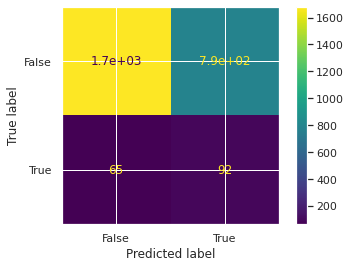

In [33]:
linear_model = best_models["linear"]
prediction = linear_model.predict(X_test)
print(classification_report(y_test, prediction))
plot_confusion_matrix(linear_model, X_test, y_test, normalize=None)
print(f"AUC Score: {roc_auc_score(y_test,prediction)}")
print("=====================")

##### Ensemble Model

              precision    recall  f1-score   support

       False       0.94      1.00      0.97      2467
        True       0.30      0.02      0.04       157

    accuracy                           0.94      2624
   macro avg       0.62      0.51      0.50      2624
weighted avg       0.90      0.94      0.91      2624

AUC Score: 0.5081354129283614


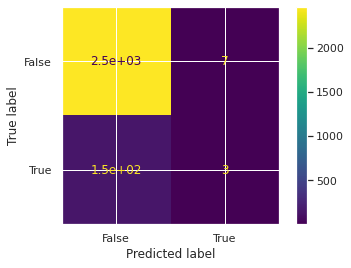

In [34]:
ensemble = best_models["ensemble"]
prediction = ensemble.predict(X_test)
print(classification_report(y_test, prediction))
print(f"AUC Score: {roc_auc_score(y_test,prediction)}")
plot_confusion_matrix(ensemble, X_test, y_test, normalize=None)
print("=====================")


##### DL model

In [35]:
dl_model = best_models["DL"]
prediction = dl_model.predict(X_test)
print(classification_report(y_test, prediction))
print(f"AUC Score: {roc_auc_score(y_test,prediction)}")
print(confusion_matrix(y_test,prediction , normalize=None))
print("=====================")

              precision    recall  f1-score   support

       False       0.96      0.54      0.69      2467
        True       0.08      0.66      0.15       157

    accuracy                           0.55      2624
   macro avg       0.52      0.60      0.42      2624
weighted avg       0.91      0.55      0.66      2624

AUC Score: 0.6032004626677234
[[1342 1125]
 [  53  104]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Work Explanation

First, we split the data to 70% train and 30% test. 
Then, we explored the train set, preprocessed the train and test set and realized:
1. The dataset has missing values only in the "NEWSITEID" column and becuase it's a categorical column that says the site ID in which the participant was treated, we decided to replace the missing values with value of "0" (new value that it does not relate to any sample).  
2. We encoded the columns that are non-numerical (i.e., boolean, categorical and ordinal) to numerical ones by: **binary encoder** for the RACE4 and NEWSITEID columns, for the INTENSIVE column we used 1 for 'Intensive' and 0 for 'Regular', and for the boolean columns we used **Ordinal encoder**.  
3. We used **standard scaler** to scale the numerical columns ("RISK10YRS",	"SBP",	"DBP", "EGFR",	"SCREAT", "CHR",	"GLUR"	,"HDL",	"TRR",	"UMALCR",	"BMI", "AGE"). But the performance was degraded. And we also used **MinMaxScaler** - which improved the ensemble model but degraded the DL model.  
4. We used imbalance techniques such as: SMOTE, TomekLinks, Cluster Centroids, and SMOTETomek, and we chose **SMOTETomek** that outperformed the other techniques. 

\* The preprocess phase was learned on the train and applied on the train and test sets. 

Because the data are imbalanced and from a clinical trial we evaluated the models with **Auc_roc** and **Recall-Precision** metrics. These metrics were chosen because classifing TP is more important than classifying TN, and we prefer high FP than high FN because it's clinical data. 

**For each model we performed a grid search to find the best hyper-paramters.**

For the linear model we checked logistic regression and linearSVM, and the logistic regression with Standard Scaler outperformed the linearSVM. The results on the test set were: AUC = 0.633, Recall = 0.61, Precision = 0.10

For the ensemble model we checked Adaboost with DecisionTree classifier and RandomForest classifier. The Adaboost model with MinMaxScaler outperformed RandomForest. The results on the test set were: 
AUC = 0.533, Recall = 0.08, Precision = 0.25 

For the DL model we used ANN with 2 hidden layers. The results were: AUC = 0.618, Recall = 0.68, Precision = 0.09

# Summary Results

We comapred between the three models' results and found out that the linear model AUC is greater than the others, but the Recall of the DL model is the greatest. If we prefer to balance between recall and precision we will choose the linear model, but if the recall is the only metric that is important we will choose the DL model. 